# Tutorial on Image-based Experimental Modal Analysis

**Klemen Zaletelj$^a$, Domen Gorjup$^a$ and Janko Slavič$^a$\***

$^a$ Faculty of Mechanical Engineering, University of Ljubljana

\* Corresponding email: janko.slavic@fs.uni-lj.si

www.ladisk.si

---

# `github.com/ladisk/ImageBasedModalAnalysisTutorial`

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-experimental-skills" data-toc-modified-id="Basic-experimental-skills-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic experimental skills</a></span><ul class="toc-item"><li><span><a href="#Acquisition-parameters" data-toc-modified-id="Acquisition-parameters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Acquisition parameters</a></span></li><li><span><a href="#Lighting" data-toc-modified-id="Lighting-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lighting</a></span></li><li><span><a href="#Surface-preperation" data-toc-modified-id="Surface-preperation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Surface preperation</a></span></li><li><span><a href="#Possible-errors" data-toc-modified-id="Possible-errors-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Possible errors</a></span><ul class="toc-item"><li><span><a href="#Out-of-focus-image" data-toc-modified-id="Out-of-focus-image-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Out of focus image</a></span></li><li><span><a href="#Improper-lighting" data-toc-modified-id="Improper-lighting-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Improper lighting</a></span></li></ul></li></ul></li><li><span><a href="#Simplified-Optical-flow-Method" data-toc-modified-id="Simplified-Optical-flow-Method-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simplified Optical-flow Method</a></span></li><li><span><a href="#The-Lucas-Kanade-Method" data-toc-modified-id="The-Lucas-Kanade-Method-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Lucas-Kanade Method</a></span></li><li><span><a href="#Frequency-Response-Functions" data-toc-modified-id="Frequency-Response-Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Frequency Response Functions</a></span></li><li><span><a href="#Modal-Analysis---camera-data,-only" data-toc-modified-id="Modal-Analysis---camera-data,-only-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modal Analysis - camera data, only</a></span></li><li><span><a href="#Modal-Analysis---Hybrid-method" data-toc-modified-id="Modal-Analysis---Hybrid-method-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modal Analysis - Hybrid method</a></span></li></ul></div>

To run this tutorial, Anaconda and these additional packages must be installed:
* ``pip install lvm_read``
* ``pip install pyFRF``
* ``pip install pyidi``
* ``pip install pyEMA``

Be sure to have the latest version of the avobe packages, use `pip install --upgrade package_name` if required.

In [1]:
import os
import numpy as np
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from ipywidgets import interact
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import warnings
warnings.filterwarnings('ignore')

import lvm_read
import pyFRF
import pyidi
import pyEMA

Some settings and functions that will be used during presentation:

In [2]:
%matplotlib inline

font_size = 15
fig_size = (16.0, 8.0)

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = fig_size
matplotlib.rcParams['font.size'] = font_size


def show_modal_data(nat_freq, damping):
    """Show modal data in a table-like structure."""
    print('   Nat. f.      Damping')
    print(23*'-')
    for i, f in enumerate(nat_freq):
        print(f'{i+1}) {f:6.1f}\t{damping[i]:5.4f}')

## Basic experimental skills
**Experimental setup**

<img src="figures/experiment_setup.jpg" width="80%">

**Excitation with modal hammer**

<video controls loop src="figures/experiment.mp4" width="100%" rotate="270deg"/>

Location of the selected files:

In [3]:
cam_fname = 'data/camera.cih'
lvm_fname = 'data/acceleration.lvm'

Load the video using [pyidi][1] package, accessible on PyPI.

[1]: https://github.com/ladisk/pyidi

The package enables calculation of displacements and will be upgraded with additional functionalities.

Currently only Photron's MRAW image file format is supported.

In [4]:
video = pyidi.pyIDI(cam_fname)

Images are stored in the ``mraw`` attribute.

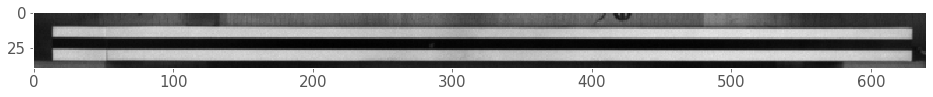

In [5]:
sequential_image_nr = 175
plt.imshow(video.mraw[sequential_image_nr], cmap='gray')
plt.grid(False)

*This example footage is for presentation purposes only and was made to be suitable for online sharing.*

*Normaly image acquisation parameters such as frame rate and image resolution would be chosen as high as possible to obtain more precise results.*

<video controls loop src="figures/video.MOV" width="950" rotate="270deg"/>

### Acquisition parameters

The parameters that were used when recording can be found in the ``info`` attribute:

In [6]:
video.info

{'Date': '2018/12/17',
 'Time': '12:48',
 'Camera Type': 'FASTCAM SA-Z type 2100K-M-64GB',
 'Head Type': 'Unknown Child Device',
 'Camera ID': 11,
 'Camera Number': 0,
 'Head Number': 1,
 'Max Head Number': 1,
 'Scene Name': '',
 'User Defined Camera Name': '',
 'Session Number': '',
 'Date Record': 'Unknown',
 'Time Record': 'Unknown',
 'Trigger Time': 0,
 'Record Rate(fps)': 15000,
 'Shutter Speed(s)': '1/15371',
 'Trigger Mode': 'Start',
 'Original Total Frame': 7500,
 'Total Frame': 3750,
 'Start Frame': 0,
 'Correct Trigger Frame': 0,
 'Save Step': 1,
 'Image Width': 640,
 'Image Height': 40,
 'Color Type': 'Mono',
 'Color Bit': 8,
 'File Format': 'MRaw',
 'EffectiveBit Depth': 12,
 'EffectiveBit Side': 'Higher',
 'Digits Of File Number': 6,
 'Device Last Error': '-1:0xffffffff',
 'Comment Text': '',
 'AnalogBoard Channel Num': 0,
 'Zero Frame': 'Exist',
 'Shutter Type2(nsec)': 65060,
 'Edge Enhance': 0,
 'Pre LUT Mode': 'DEF1',
 'Pre LUT Brightness': 0,
 'Pre LUT Contrast': 0,
 '

### Lighting
Lighting conditions are very important when using high-speed camera. To obtain optimal lighting conditions, a histogram of pixel intensity is viewed. An example of a well balanced historgram is shown.

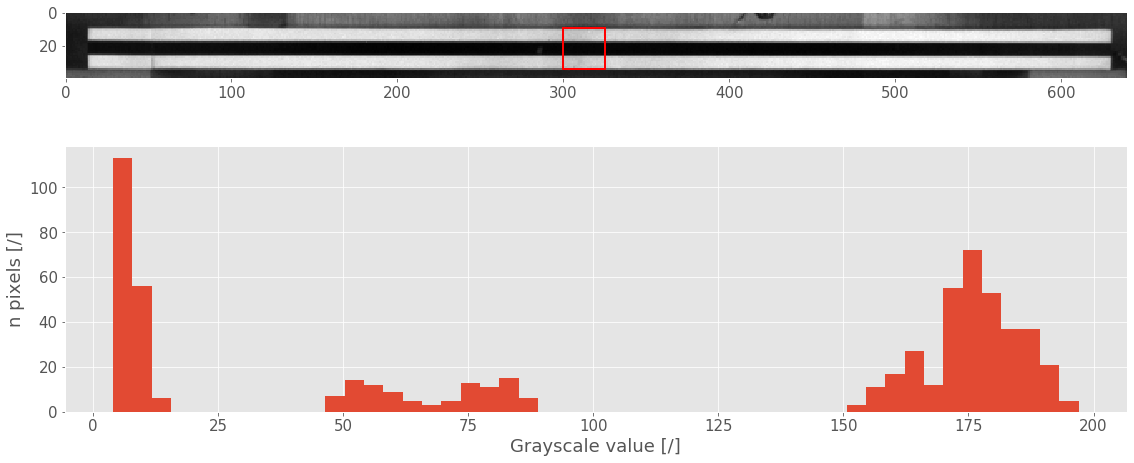

In [7]:
selected_frame = 0
x0 = 300 # position of observed rectangle
y0, d = 9, 25
roi = video.mraw[selected_frame, y0:y0+d, x0:x0+d]

fig, ax = plt.subplots(2)
ax[0].imshow(video.mraw[selected_frame], cmap='gray')
ax[1].hist(roi.flatten(), bins=50);
# Formating
ax[0].add_patch(patches.Rectangle((x0, y0), d, d, fill=False, color='r', linewidth=2))
ax[0].grid(False)
ax[1].set_xlabel('Grayscale value [/]')
ax[1].set_ylabel('n pixels [/]')
plt.tight_layout()

### Surface preperation
In order for gradient-based methods to work, sufficient gradient must be present on the images. Surface preperations is therefor necessary.

Stripe pattern and random speckle pattern generation is implemented in the [speckle-pattern][1] python module. In this case, horizontal stripes were used.

[1]: https://github.com/ladisk/speckle_pattern

In [8]:
grad0, grad1 = np.gradient(video.mraw[0].astype(float)) # gradient computation

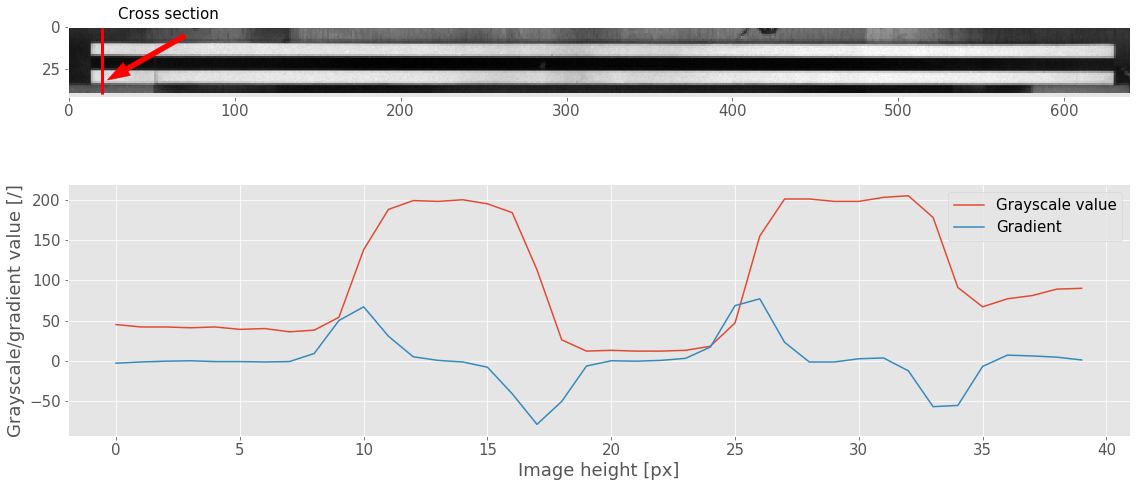

In [9]:
x0 = 20 # position of cross section

fig, ax = plt.subplots(2)
ax[0].imshow(video.mraw[selected_frame], cmap='gray')
ax[1].plot(video.mraw[selected_frame, :, x0], label='Grayscale value')
ax[1].plot(grad0[:, x0], label='Gradient')
# Formating
ax[0].vlines(x0, 0, 40, colors='r', linewidth=3)
ax[0].text(x0+10, -5, 'Cross section')
ax[0].arrow(x0+50, 5, -35, 20, color='r', width=3)
ax[0].grid(False)
ax[1].set_xlabel('Image height [px]')
ax[1].set_ylabel('Grayscale/gradient value [/]')
plt.legend()
plt.tight_layout()

### Possible errors

#### Out of focus image
The right side of the beam is in focus, while the left side is not.

In [10]:
layout_fname = r'data/focus.cih'
video_layout = pyidi.pyIDI(layout_fname)

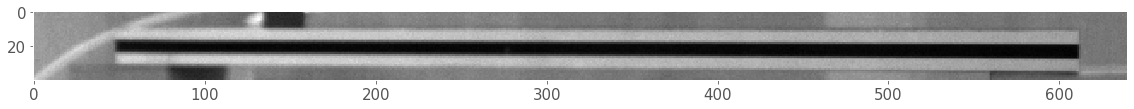

In [11]:
fig, ax = plt.subplots()
ax.imshow(video_layout.mraw[0], 'gray')

# Formating
ax.grid(False)
plt.tight_layout()

#### Improper lighting

In [12]:
light_fname = r'data/illumination.cih'
video_light = pyidi.pyIDI(light_fname)

In [13]:
selected_frame = 0
y0, d = 9, 20

def show(x0):
    roi = video_light.mraw[selected_frame, y0:y0+d, x0:x0+d*2]
    fig, ax = plt.subplots(2)
    ax[0].imshow(video_light.mraw[selected_frame], cmap='gray')
    ax[1].hist(roi.flatten(), bins=50);
    # Formating
    ax[0].add_patch(patches.Rectangle((x0, y0), d*2, d, fill=False, color='r', linewidth=2))
    ax[0].grid(False)
    ax[1].set_xlabel('Grayscale value [/]')
    ax[1].set_ylabel('n pixels [/]')
    ax[1].set_xlim([0, 260])
    plt.tight_layout()
interact(show, x0=(75, 550, 50));

interactive(children=(IntSlider(value=275, description='x0', max=550, min=75, step=50), Output()), _dom_classe…

## Simplified Optical-flow Method

Basic formulation:
$$
s(x_j,y_k,t)=\frac{I_0(x_j,y_k)-I(x_j,y_k,t)}{|\nabla I_0|}
$$

As used by [Javh et al.][1] ([pdf][2]).

[1]: https://www.sciencedirect.com/science/article/pii/S0888327016304770
[2]: http://lab.fs.uni-lj.si/ladisk/?what=abstract&ID=179

First, the reference image must be computed:

In [14]:
reference_image = np.average(video.mraw[:10], axis=0)

and gradients in ``x`` (1) and ``y`` (0) directions:

In [15]:
grad0, grad1 = np.gradient(reference_image)

Points with the highest absolute value of gradient in **vertical** direction are determined:

In [16]:
border = 20
border_h = 12
n = 2
N = 20
w = np.arange(border, reference_image.shape[1]-border, np.abs(border - reference_image.shape[1]-border)//N)
h = np.argsort(np.abs(grad0[border_h:-border_h, w]), axis=0)[-n:, :].T + border_h
inds = np.column_stack((h.flatten(), w.repeat(n)))

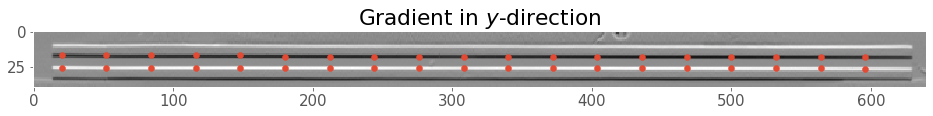

In [17]:
fig, ax = plt.subplots()
ax.imshow(grad0, cmap='gray')
ax.scatter(inds[:, 1], inds[:, 0])
ax.grid(False)
ax.set_title('Gradient in $y$-direction');

Displacement computation, implemented in ``pyidi``:

In [18]:
video.set_points(points=inds) # setting points for analysis

In [19]:
video.set_method(method='sof',
                mean_n_neighbours=n)

``get_displacements()`` method computes the displacements.

In [20]:
displacements = video.get_displacements() * 2.43 * 1e-4

100%|██████████████████████████████████████████████████████████| 3750/3750 [00:05<00:00, 704.11it/s]


Averaging...
Finished!


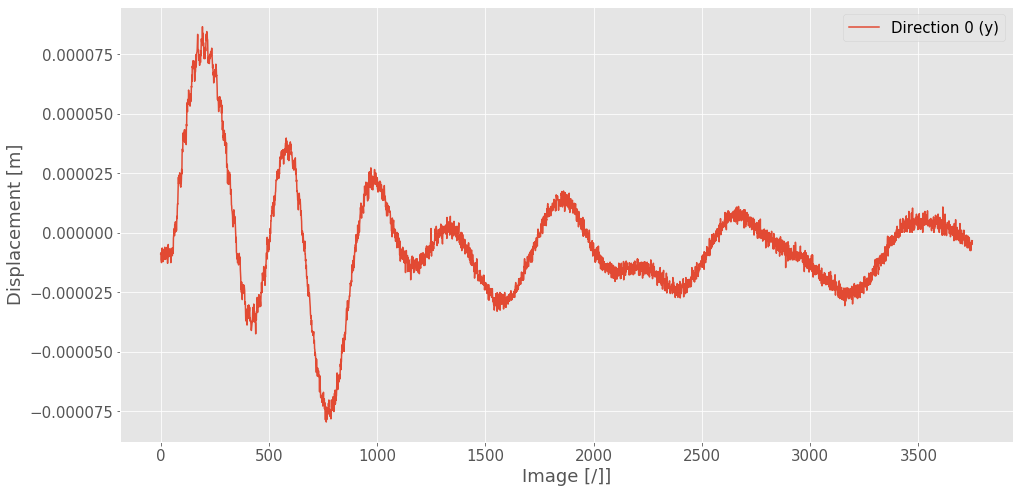

In [21]:
show_identified_point = 10
fig, ax = plt.subplots()
ax.plot(displacements[show_identified_point, :, 0], label='Direction 0 (y)');
ax.set_xlabel('Image [/]]')
ax.set_ylabel('Displacement [m]')
plt.legend()

## The Lucas-Kanade Method

By solving an overdetermined system of optical flow equations for a specified region of the image, 2D displacements of the subset can be calculated:

$$
\begin{equation}
	\begin{bmatrix}
		\Delta x \\
		\Delta y
	\end{bmatrix} =
	\begin{bmatrix}
		\sum g_x^2 &\sum  g_x \, g_y \\
		\sum  g_x \, g_y &\sum g_y^2
	\end{bmatrix}^{-1}
	\begin{bmatrix}
		\sum g_x \, (f-g) \\
		\sum g_y \, (f-g)
	\end{bmatrix}
\end{equation}
$$

where 

$f(\mathbf{x}) \dots$ current (displaced) image

$g(\mathbf{x}) \dots$ reference image

In [22]:
points_lk = np.column_stack([np.ones_like(w)*video.info['Image Height']//2, w])

In [23]:
video.set_points(points_lk)
video.set_method('lk', roi_size=(21, 27), max_nfev=10, int_order=3)

In [24]:
points_lk.shape

(19, 2)

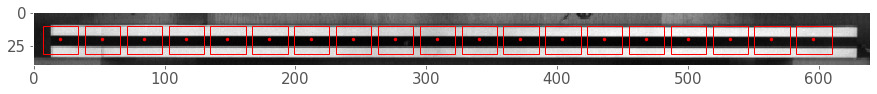

In [25]:
video.show_points()

In [26]:
# displacements_lk = video.get_displacements(processes=2) * 2.43 * 1e-4 # this might take a minute

In [27]:
displacements_lk = np.load('data/displacements_lk.npy')

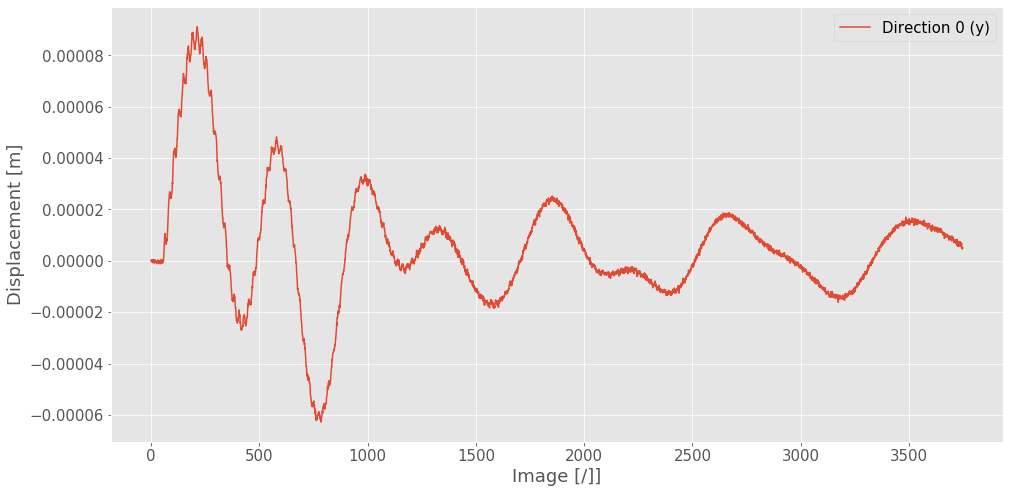

In [28]:
fig, ax = plt.subplots()
ax.plot(displacements_lk[show_identified_point, :, 0], label='Direction 0 (y)')
ax.set_xlabel('Image [/]]')
ax.set_ylabel('Displacement [m]')
plt.legend()

In [29]:
displacements = displacements_lk

## Frequency Response Functions

In [30]:
upper_f_limit = 4000 # upper observed frequency

First the FFT of displacement is computed:

In [31]:
N = int(video.info['Total Frame'])
dt = 1/int(video.info['Record Rate(fps)'])
1/dt

15000.0

In [32]:
T = dt*N
T

0.25

In [33]:
freq_cam = np.fft.rfftfreq(N, dt)
fft_cam = np.fft.rfft(displacements[:, :, 0], N) *2/N

Later the frequency range below `upper_f_limit` Hz is used:

In [34]:
fft_cam = np.copy(fft_cam[:, freq_cam<upper_f_limit])
freq_cam = np.copy(freq_cam[freq_cam<upper_f_limit])

The FFT of force measurement is (also limited to `upper_f_limit`):

In [35]:
lvm = lvm_read.read(lvm_fname)
force = lvm[0]['data'][:-30, 1] # 30 pre-samples
N = len(force)//4 # the video was captured for 1/4 of a second
dt = lvm[0]['Delta_X'][1]

fft_force = np.fft.rfft(force, N) *2/N
freq_force = np.fft.rfftfreq(N, dt)

fft_force = np.copy(fft_force[freq_force<upper_f_limit])
freq_force = np.copy(freq_force[freq_force<upper_f_limit])

Since only one measurement was used, the FRF is determined by:

In [36]:
frf_cam = fft_cam/fft_force 

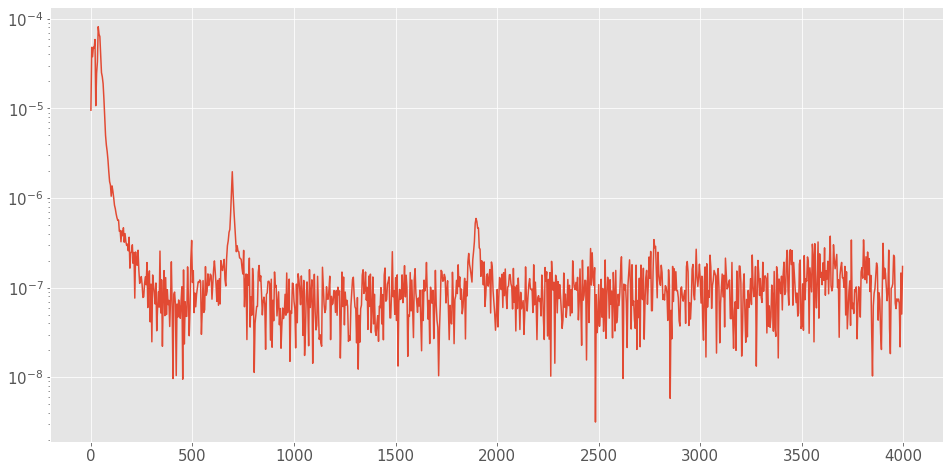

In [37]:
location = 3
plt.semilogy(freq_cam, np.abs(frf_cam[location]));

## Modal Analysis - camera data, only

Modal analysis can be made using ``pyEMA`` package, accessible on [PyPI][1].

[1]: https://pypi.org/project/pyEMA/

In [38]:
cam = pyEMA.Model(frf_cam, freq_cam, pol_order_high=50, upper=upper_f_limit)

Poles are computed:

In [39]:
cam.get_poles(show_progress=True)

100%|██████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 182.25it/s]


Stable poles can be picked in the stability chart, or preditermind by passing in approximate natural frequencies (picking poles works only in the interactive mode, use magic command: %matplotlib qt).

In [40]:
cam.stab_chart(cam.all_poles)

100%|██████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 109.90it/s]


SHIFT + LEFT mouse button to pick a pole.
RIGHT mouse button to erase the last pick.
1. Frequency: ~698 -->	694.984283593542 Hz	(xi = -0.0008)
2. Frequency: ~1892 -->	1897.7906428625336 Hz	(xi = -0.0003)
3. Frequency: ~2463 -->	2466.9766435162865 Hz	(xi = -0.0060)


<Figure size 1152x576 with 0 Axes>

In [41]:
cam.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  695.0	-0.0008
2) 1897.8	-0.0003
3) 2467.0	-0.0060


After the stable poles are determind, a ``lsfd`` method can be called to reconstruct the FRF:

In [42]:
frf_rec, shapes_cam = cam.get_constants(FRF_ind='all')

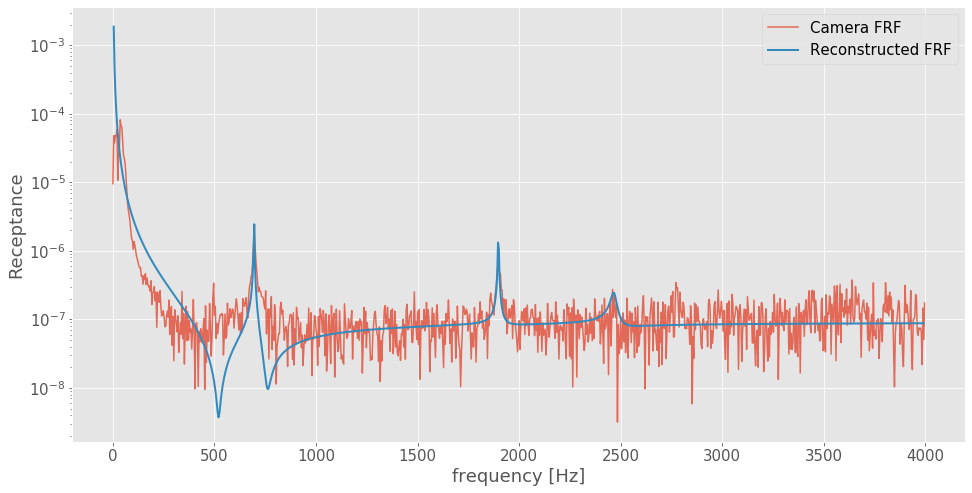

In [43]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[location]), label='Camera FRF', alpha=0.8)
ax.semilogy(freq_cam[:-1], np.abs(frf_rec[location]), label='Reconstructed FRF', lw=2)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Receptance')
plt.legend();

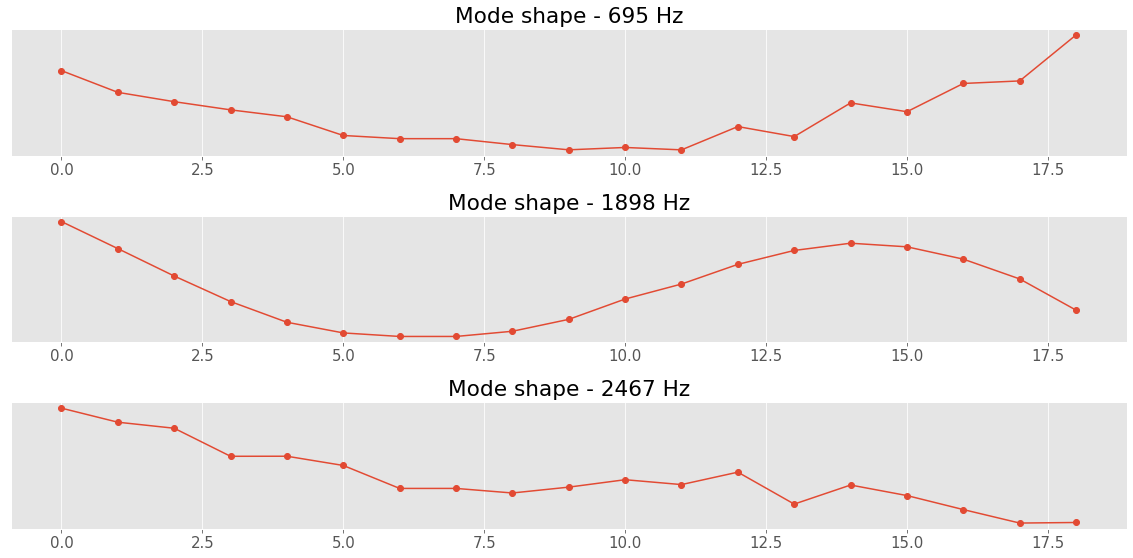

In [44]:
fig, ax = plt.subplots(shapes_cam.shape[1])
for i, a in enumerate(ax):
    a.plot(shapes_cam[:, i], 'o-')
    a.set_title(f'Mode shape - {cam.nat_freq[i]:.0f} Hz')
    a.set_yticks([])
plt.tight_layout()

## Modal Analysis - Hybrid method

Hybrid method was developed by Javh et al. Further details can be found [here][1] ([pdf][2])

First, the acceleration and force data are needed:

[1]: https://www.sciencedirect.com/science/article/pii/S0888327017302637
[2]: http://lab.fs.uni-lj.si/ladisk/?what=abstract&ID=192

In [45]:
hyb_acc = lvm[0]['data'][:-30, 0] * 9.81 # acceleration data (converted to m/s**2)

The FRF can be computed using ``pyFRF`` package, accessible on [PyPI][1].

[1]: https://pypi.org/project/pyFRF/

In [46]:
import pyFRF

frf_ = pyFRF.FRF(
    sampling_freq=1/dt,
    exc=force,
    resp=hyb_acc,
    exc_window='None',
    resp_type='a',
    resp_window='None')

Only the frequencies lower than `upper_f_limit` Hz are observed:

In [47]:
freq_acc = frf_.get_f_axis()
frf_acc = frf_.get_FRF(form='receptance')

frf_acc = frf_acc[freq_acc<upper_f_limit]
freq_acc = freq_acc[freq_acc<upper_f_limit]

The location of acceleration measurement is at identified camera point with index 3:

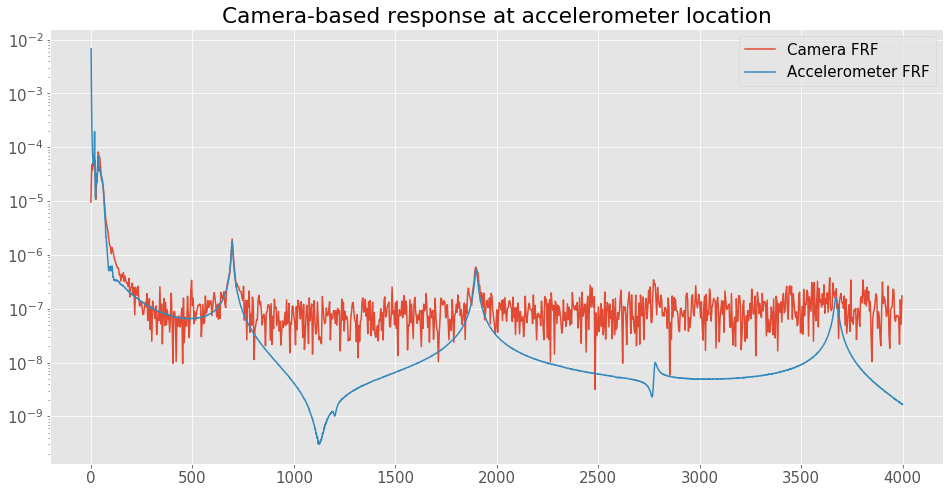

In [48]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[location]), label='Camera FRF')
ax.semilogy(freq_acc, np.abs(frf_acc), label='Accelerometer FRF')
ax.set_title('Camera-based response at accelerometer location')
plt.legend();

Next the ``lscf`` object can be created and poles are computed for the hybrid method:

In [49]:
acc = pyEMA.Model(frf_acc[1:], freq_acc[1:], pol_order_high=50, upper=upper_f_limit)

In [50]:
acc.get_poles(show_progress=True)

100%|██████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 221.58it/s]


In [51]:
acc.stab_chart(acc.all_poles)

100%|██████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 128.03it/s]


SHIFT + LEFT mouse button to pick a pole.
RIGHT mouse button to erase the last pick.
1. Frequency: ~698 -->	694.9928499821378 Hz	(xi = 0.0047)
2. Frequency: ~1205 -->	1201.834220015591 Hz	(xi = 0.0063)
3. Frequency: ~1895 -->	1897.5514541607301 Hz	(xi = 0.0031)
Deleting the last pick...
Deleting the last pick...
2. Frequency: ~1898 -->	1897.5514541607301 Hz	(xi = 0.0031)
3. Frequency: ~2768 -->	2777.3212830229986 Hz	(xi = 0.0024)
4. Frequency: ~3668 -->	3671.1858976830067 Hz	(xi = 0.0020)


<Figure size 1152x576 with 0 Axes>

In [52]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  695.0	0.0047
2) 1897.6	0.0031
3) 2777.3	0.0024
4) 3671.2	0.0020


The poles computed based on accleration data are more reliable. These poles can now be used in reconstruction of FRFs from camera. A new ``lscf`` object is made with camera FRF:

In [53]:
cam_hyb = pyEMA.Model(frf_cam, freq_cam)

Next, the reconstruction is done using accleration-determined poles:

In [54]:
frf_hyb, shapes_hybrid = cam_hyb.get_constants(whose_poles=acc)

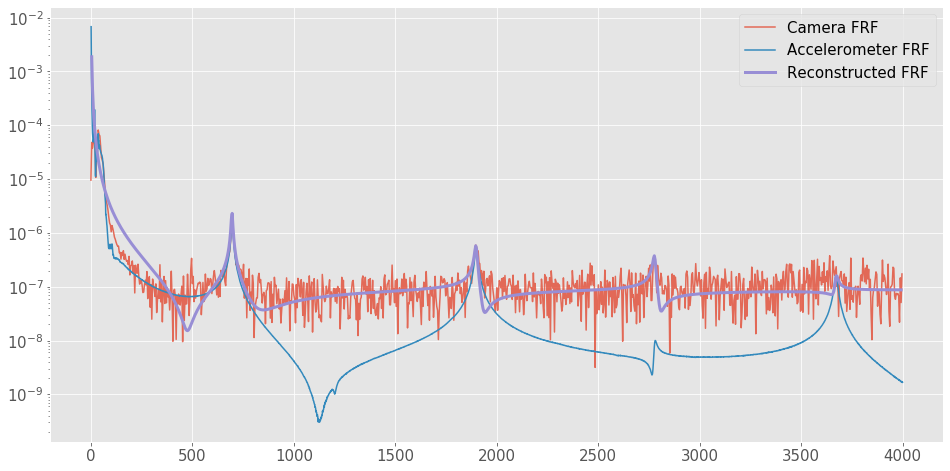

In [55]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[3]), label='Camera FRF', alpha=0.8)
ax.semilogy(freq_acc, np.abs(frf_acc), label='Accelerometer FRF')
ax.semilogy(freq_cam[:-1], np.abs(frf_hyb[3]), label='Reconstructed FRF', lw=3)
plt.legend();

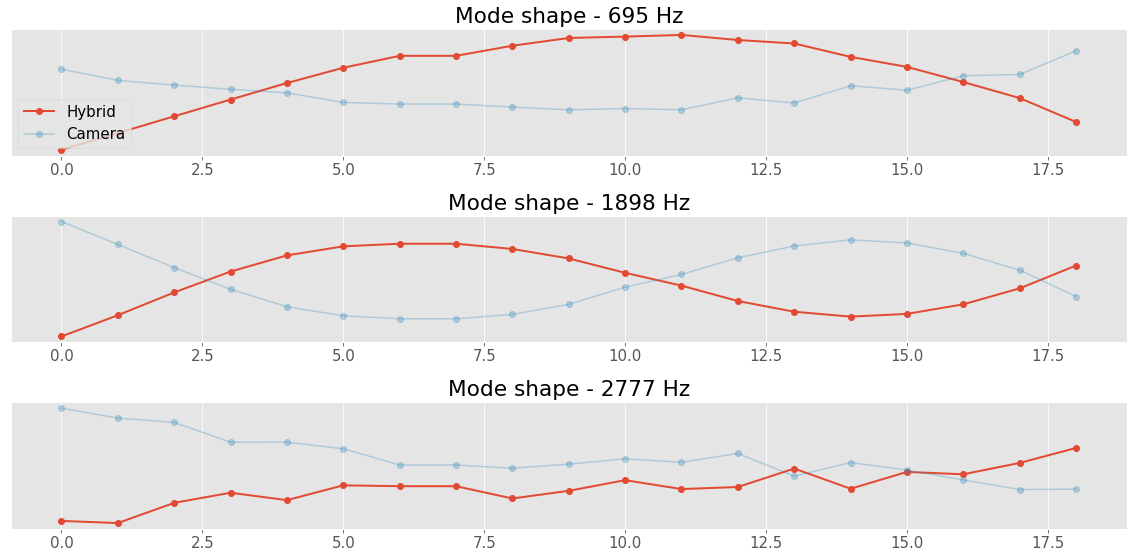

In [56]:
fig, ax = plt.subplots(shapes_cam.shape[-1])
for i, a in enumerate(ax):
    cam_freq = cam.nat_freq[i]
    hybrid_f_index = np.argmin(np.abs(acc.nat_freq - cam_freq))
    plot1 = a.plot(shapes_hybrid[:, hybrid_f_index] / np.max(np.abs(shapes_hybrid[:, hybrid_f_index])), 
                   'o-', lw=2, label='Hybrid')
    plot2 = a.plot(shapes_cam[:, i] / np.max(np.abs(shapes_cam[:, i])), 
                   'o-', alpha=0.3, label='Camera')
    a.set_title(f'Mode shape - {acc.nat_freq[hybrid_f_index]:.0f} Hz')
    a.set_yticks([])
ax[0].legend()
plt.tight_layout()

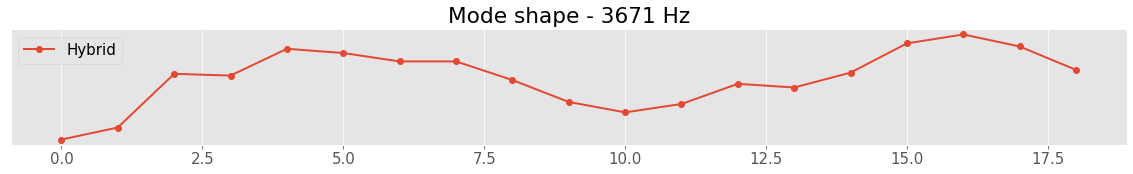

In [58]:
plt.figure(figsize=(fig_size[0], fig_size[1]/3))
plt.gca().set_yticks([])
plt.plot(shapes_hybrid[:, -1], 'o-', lw=2, label='Hybrid')
plt.title(f'Mode shape - {acc.nat_freq[-1]:.0f} Hz')
plt.tight_layout()
plt.legend()

---

<a href="http://www.ladisk.si/imageEMASummer.php"><img src="figures/Summer School on High-speed Image Based Experimental Modal Analysis & Open Source Tools.png" width="90%"></a>